                    Time  EventTime  Bytes  Second
1.707207e+09    7.412704         90    NaN       7
1.707207e+09    9.453369         90    NaN       9
1.707207e+09   12.136064         90    NaN      12
1.707207e+09   14.895281         90    NaN      15
1.707207e+09   22.599921         90    NaN      23
1.707207e+09   27.135484         90    NaN      27
1.707207e+09   27.696841         90    NaN      28
1.707207e+09   33.908896         90    NaN      34
1.707207e+09   38.164730         90    NaN      38
1.707207e+09   45.791200         89    NaN      46
1.707207e+09   48.056458         90    NaN      48
1.707207e+09   48.232114         88    NaN      48
1.707207e+09   52.557710         89    NaN      53
1.707207e+09   54.148161         89    NaN      54
1.707207e+09   54.229520         89    NaN      54
1.707207e+09   64.519202         89    NaN      65
1.707207e+09   72.726345         89    NaN      73
1.707207e+09   78.508143         90    NaN      79
1.707207e+09   85.086834       

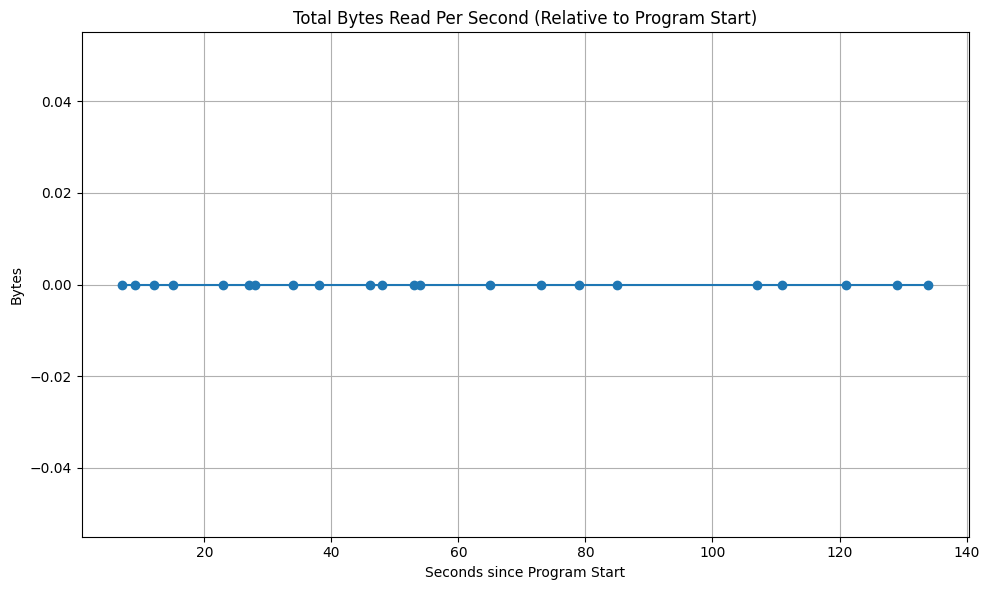

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Path to your data file
file_path = '../server/logfile.txt'

# Open and read the file
with open(file_path, 'r') as file:
    data = file.read()

# Split data into lines and extract the program start time from the title
lines = data.split('\n')
program_start_time = float(lines[0].split(': ')[1])
data = '\n'.join(lines[1:])  # Remove the title line for further processing

# Convert string data to DataFrame
df = pd.read_csv(StringIO(data), sep=" ", header=None, names=["Time", "EventTime", "Bytes"])

# Adjust Time to seconds relative to the start time
df['Time'] -= program_start_time
df['Second'] = df['Time'].apply(lambda x: round(x))

print(df)

# Sum bytes read per adjusted second
bytes_per_second = df.groupby('Second')['Bytes'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(bytes_per_second['Second'], bytes_per_second['Bytes'], marker='o')
plt.title('Total Bytes Read Per Second (Relative to Program Start)')
plt.xlabel('Seconds since Program Start')
plt.ylabel('Bytes')
plt.grid(True)
plt.tight_layout()

# Display plot
plt.show()


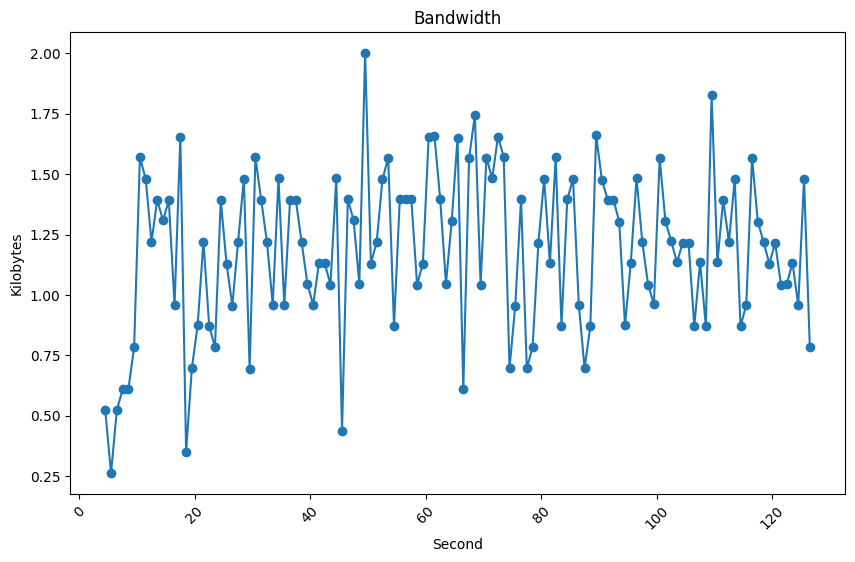

<Figure size 640x480 with 0 Axes>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Path to your data file
file_path = '../server/logfile.txt'

# Open and read the file
with open(file_path, 'r') as file:
    data = file.read()

# Save the first line as the program start time
program_start_time = float(data.split('\n')[0].split(': ')[1])

# Remove the first line
data = '\n'.join(data.split('\n')[1:])

# Convert string data to DataFrame
df = pd.read_csv(StringIO(data), sep="\s+", header=None, names=["Time", "EventTime", "Bytes"])

# Convert Time to seconds (round down to nearest second)
df['Second'] = df['Time'].astype(int) - program_start_time

# print(df)

# Sum bytes read per second
bytes_per_second = df.groupby('Second')['Bytes'].sum().reset_index()

# Convert bytes to kilobytes (KB)
bytes_per_second['Bytes'] = bytes_per_second['Bytes'] / 1024
bytes_per_second.rename(columns={'Bytes': 'Kilobytes'}, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(bytes_per_second['Second'], bytes_per_second['Kilobytes'], marker='o')
plt.title('Bandwidth')
plt.xlabel('Second')
plt.ylabel('Kilobytes')
plt.grid(False)
plt.xticks(rotation=45)
# plt.tight_layout()

# Display plot
plt.show()

plt.savefig('Bandwidth_1.png')
